<a href="https://colab.research.google.com/github/LamineGith/PyTorch/blob/main/Transfer_learning_using_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The CIFAR 10 dataset

The CIFAR-10 and CIFAR-100 are labeled subsets of the 80 million tiny images dataset. They were collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton.
The CIFAR-10 dataset
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

Here are the classes in the dataset, as well as 10 random images from each:

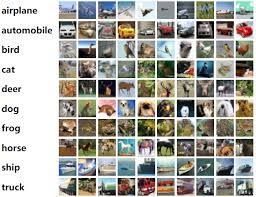
The classes are completely mutually exclusive. There is no overlap between automobiles and trucks. "Automobile" includes sedans, SUVs, things of that sort. "Truck" includes only big trucks. Neither includes pickup trucks.

#VGG16

In [1]:
# Setting seeds to try and ensure we have the same results - this is not guaranteed across PyTorch releases.
import torch
torch.manual_seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [2]:
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader

In [3]:
print(torch.__version__)

1.13.0+cu116


In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

**Data preprocessing (Resize and normalize)**

In [5]:
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
    ])

trainset = datasets.CIFAR10(root='~/.pytorch/CIFAR10',train=True, download=True,transform=transform)
testset = datasets.CIFAR10(root='~/.pytorch/CIFAR10',train=False, transform=transform)

trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting /root/.pytorch/CIFAR10/cifar-10-python.tar.gz to /root/.pytorch/CIFAR10


In [6]:
for images, labels in trainloader:
  print(images.size(), labels.size())
  break

torch.Size([64, 3, 224, 224]) torch.Size([64])


In [7]:
model = models.vgg16(pretrained=True)
model

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

# Transfer learning - Fixed Feature Extractor

In [8]:
model.features

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_si

In [10]:
model.classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)

**When we have the model, we have modified the model parameters according to our data. We can stop the propagation inside the network in defines layer before the classifier or change the last fully connected network and retrain it.** 

In [11]:
for param in model.parameters():
  param.requires_grad = False

Here we want to remove the last fully connected layer and change the output layer because we have 10 instead of 1000 classes. We add the logSoftmax at the end. 

In [12]:
model.classifier[-1] = nn.Sequential(
                       nn.Linear(in_features=4096, out_features=10),
                       nn.LogSoftmax(dim=1)
                        )

In [13]:
model.classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Sequential(
    (0): Linear(in_features=4096, out_features=10, bias=True)
    (1): LogSoftmax(dim=1)
  )
)

**Training the Fixed Feature Extractor**

In [14]:
from torch.optim import Adam

model = model.to(device)
optimizer = Adam(model.parameters())

In [15]:
criterion = nn.NLLLoss()

In [16]:
num_epochs = 1
batch_loss = 0
cum_epoch_loss = 0

for e in range(num_epochs):
  cum_epoch_loss = 0
  
  for batch, (images, labels) in enumerate(trainloader,1):
    images = images.to(device)
    labels = labels.to(device)
    criterion = criterion 
    optimizer.zero_grad()
    logps = model(images)
    loss = criterion(logps, labels)
    loss.backward()
    optimizer.step()
    
    batch_loss += loss.item()
    print(f'Epoch({e}/{num_epochs} : Batch number({batch}/{len(trainloader)})  Batch loss : {loss.item()}')
    
  print(f'Training loss : {batch_loss/len(trainloader)}') 

Epoch(0/1 : Batch number(1/782)  Batch loss : 2.4472618103027344
Epoch(0/1 : Batch number(2/782)  Batch loss : 2.231184482574463
Epoch(0/1 : Batch number(3/782)  Batch loss : 2.0071535110473633
Epoch(0/1 : Batch number(4/782)  Batch loss : 1.9421484470367432
Epoch(0/1 : Batch number(5/782)  Batch loss : 1.9430814981460571
Epoch(0/1 : Batch number(6/782)  Batch loss : 1.6382205486297607
Epoch(0/1 : Batch number(7/782)  Batch loss : 1.5217958688735962
Epoch(0/1 : Batch number(8/782)  Batch loss : 1.3577253818511963
Epoch(0/1 : Batch number(9/782)  Batch loss : 1.4438300132751465
Epoch(0/1 : Batch number(10/782)  Batch loss : 1.2072449922561646
Epoch(0/1 : Batch number(11/782)  Batch loss : 1.0614283084869385
Epoch(0/1 : Batch number(12/782)  Batch loss : 1.2457263469696045
Epoch(0/1 : Batch number(13/782)  Batch loss : 1.0670894384384155
Epoch(0/1 : Batch number(14/782)  Batch loss : 1.09145987033844
Epoch(0/1 : Batch number(15/782)  Batch loss : 1.1152921915054321
Epoch(0/1 : Batch numb

**Evaluating the network and viewing images**

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

Here for the model evaluating, we have to move back the model into CPU because, the image we use run only on CPU

In [18]:
CIFAR10_classes = ['plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


model.to('cpu')

model.eval()

with torch.no_grad():
  images, labels = next(iter(testloader))
  logps = model(images)
  
  output = torch.exp(logps)
  print(output)

tensor([[1.2113e-03, 5.7369e-03, 1.9268e-03, 8.9940e-01, 2.0054e-04, 3.5575e-02,
         4.7963e-02, 5.1541e-03, 2.6829e-03, 1.4812e-04],
        [8.5297e-03, 3.4591e-01, 1.8998e-05, 3.8195e-05, 2.3665e-06, 2.4522e-06,
         2.7087e-06, 2.0283e-06, 6.4424e-01, 1.2575e-03],
        [3.0444e-04, 2.0631e-03, 5.6353e-07, 2.5822e-07, 9.0606e-08, 1.5962e-08,
         7.6774e-09, 2.2511e-07, 9.9761e-01, 1.8954e-05],
        [2.5504e-01, 2.0685e-03, 7.3005e-02, 7.5947e-02, 1.3378e-03, 1.6631e-03,
         1.2541e-03, 1.2839e-03, 5.8759e-01, 8.1071e-04],
        [3.3044e-07, 2.0871e-07, 4.2308e-03, 4.2265e-04, 1.4117e-04, 1.4808e-05,
         9.9519e-01, 1.1944e-07, 1.3658e-07, 3.1089e-08],
        [6.8892e-06, 1.9955e-06, 1.2071e-04, 1.0398e-01, 2.2045e-02, 1.4370e-01,
         7.2937e-01, 7.3934e-04, 1.0501e-06, 2.7530e-05],
        [4.5535e-05, 9.9389e-01, 8.8168e-07, 4.6423e-05, 9.2625e-08, 3.4999e-05,
         4.9127e-06, 2.5228e-05, 1.2084e-05, 5.9362e-03],
        [3.3074e-02, 5.9544

In [19]:
CIFAR10_classes = ['plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


model.to('cpu')

model.eval()

with torch.no_grad():
  images, labels = next(iter(testloader))
  logps = model(images)
  
  output = torch.exp(logps)
  
  pred = torch.argmax(output,1)
    
model.train()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

ship


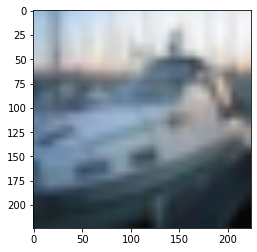

In [21]:
test_image_id=2

def denormalize(tensor):
  tensor = tensor*std+ mean
  return tensor

def show_img(img):
  img = img.numpy().transpose((1,2,0))
  img = denormalize(img)
  img = np.clip(img,0,1)
  plt.imshow(img)
  
def get_CIFAR10_class(id):
  CIFAR10_classes = ['plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
  return CIFAR10_classes[id]

show_img(images[test_image_id])
print(get_CIFAR10_class(pred[test_image_id]))

**Viewing images & normalization - Under the hood**

In [22]:
pred

tensor([3, 8, 8, 8, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 0, 4, 9,
        5, 2, 3, 0, 9, 6, 6, 5, 4, 5, 9, 5, 4, 1, 9, 5, 2, 6, 5, 6, 0, 9, 3, 9,
        7, 6, 9, 8, 0, 3, 8, 8, 7, 3, 3, 3, 7, 3, 6, 3])

In [23]:
images.size()

torch.Size([64, 3, 224, 224])

In [24]:
images[0].size()

torch.Size([3, 224, 224])

In [26]:
np.transpose(images[test_image_id],(1,2,0))

tensor([[[ 0.5878,  1.2906,  2.0648],
         [ 0.5878,  1.2906,  2.0648],
         [ 0.5878,  1.2906,  2.0648],
         ...,
         [ 1.9578,  2.1835,  2.4831],
         [ 1.9578,  2.1835,  2.4831],
         [ 1.9578,  2.1835,  2.4831]],

        [[ 0.5878,  1.2906,  2.0648],
         [ 0.5878,  1.2906,  2.0648],
         [ 0.5878,  1.2906,  2.0648],
         ...,
         [ 1.9578,  2.1835,  2.4831],
         [ 1.9578,  2.1835,  2.4831],
         [ 1.9578,  2.1835,  2.4831]],

        [[ 0.5878,  1.2906,  2.0648],
         [ 0.5878,  1.2906,  2.0648],
         [ 0.5878,  1.2906,  2.0648],
         ...,
         [ 1.9578,  2.1835,  2.4831],
         [ 1.9578,  2.1835,  2.4831],
         [ 1.9578,  2.1835,  2.4831]],

        ...,

        [[-1.6384, -1.3179, -0.9853],
         [-1.6384, -1.3179, -0.9853],
         [-1.6384, -1.3179, -0.9853],
         ...,
         [-1.9980, -1.8957, -1.6824],
         [-1.9980, -1.8957, -1.6824],
         [-1.9980, -1.8957, -1.6824]],

        [[

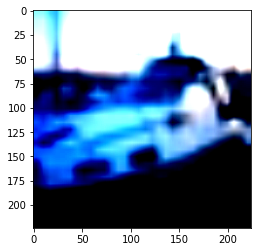

In [27]:
plt.imshow(np.clip(np.transpose(images[test_image_id],(1,2,0)),0,1))

In [35]:
# The z-core isq defined for the normalization step.
#z = (x - mean) / std

In [30]:
def denormalize(tensor):
  tensor = tensor*std + mean
  return tensor

In [31]:
def show_img(img):
  img = img.numpy().transpose((1,2,0))
  img = denormalize(img)
  img = np.clip(img,0,1)
  plt.imshow(img)

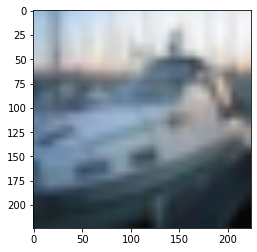

In [32]:
show_img(images[test_image_id])

In [33]:
def get_CIFAR10_class(id):
  CIFAR10_classes = ['plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
  return CIFAR10_classes[id]
  

In [34]:
get_CIFAR10_class(pred[test_image_id])

'ship'

**Accuracy of the model**

In [36]:
model.eval()
with torch.no_grad():
    num_correct = 0
    total = 0

    cnt = 0
    #set_trace()
    for images, labels in testloader:
        
        logps = model(images)
        output = torch.exp(logps)
        print(output)
        cnt+=1
        
        if cnt > 0:
          break

tensor([[1.2113e-03, 5.7369e-03, 1.9268e-03, 8.9940e-01, 2.0054e-04, 3.5575e-02,
         4.7963e-02, 5.1541e-03, 2.6829e-03, 1.4812e-04],
        [8.5297e-03, 3.4591e-01, 1.8998e-05, 3.8195e-05, 2.3665e-06, 2.4522e-06,
         2.7087e-06, 2.0283e-06, 6.4424e-01, 1.2575e-03],
        [3.0444e-04, 2.0631e-03, 5.6353e-07, 2.5822e-07, 9.0606e-08, 1.5962e-08,
         7.6774e-09, 2.2511e-07, 9.9761e-01, 1.8954e-05],
        [2.5504e-01, 2.0685e-03, 7.3005e-02, 7.5947e-02, 1.3378e-03, 1.6631e-03,
         1.2541e-03, 1.2839e-03, 5.8759e-01, 8.1071e-04],
        [3.3044e-07, 2.0871e-07, 4.2308e-03, 4.2265e-04, 1.4117e-04, 1.4808e-05,
         9.9519e-01, 1.1944e-07, 1.3658e-07, 3.1089e-08],
        [6.8892e-06, 1.9955e-06, 1.2071e-04, 1.0398e-01, 2.2045e-02, 1.4370e-01,
         7.2937e-01, 7.3934e-04, 1.0501e-06, 2.7530e-05],
        [4.5535e-05, 9.9389e-01, 8.8168e-07, 4.6423e-05, 9.2625e-08, 3.4999e-05,
         4.9127e-06, 2.5228e-05, 1.2084e-05, 5.9362e-03],
        [3.3074e-02, 5.9544

In [37]:
pred,labels

(tensor([3, 8, 8, 8, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 0, 4, 9,
         5, 2, 3, 0, 9, 6, 6, 5, 4, 5, 9, 5, 4, 1, 9, 5, 2, 6, 5, 6, 0, 9, 3, 9,
         7, 6, 9, 8, 0, 3, 8, 8, 7, 3, 3, 3, 7, 3, 6, 3]),
 tensor([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 0, 4, 9,
         5, 2, 4, 0, 9, 6, 6, 5, 4, 5, 9, 2, 4, 1, 9, 5, 4, 6, 5, 6, 0, 9, 3, 9,
         7, 6, 9, 8, 0, 3, 8, 8, 7, 7, 4, 6, 7, 3, 6, 3]))

In [39]:
pred == labels

tensor([ True,  True,  True,  True,  True, False,  True,  True,  True,  True,
        False,  True,  True, False,  True,  True,  True,  True,  True, False,
         True,  True,  True, False,  True,  True,  True,  True,  True,  True,
         True, False,  True,  True,  True,  True,  True, False,  True,  True,
         True,  True,  True,  True,  True,  True, False, False, False, False,
         True,  True, False, False,  True,  True,  True, False,  True,  True,
        False,  True,  True,  True])

In [40]:
model.eval()
with torch.no_grad():
    num_correct = 0
    total = 0


    for batch, (images, labels) in enumerate(testloader,1):
        
        logps = model(images)
        output = torch.exp(logps)
        
        pred = torch.argmax(output, 1)
        total += labels.size(0)
        num_correct += (pred == labels).sum().item()
        print(f'Batch ({batch}/{len(testloader)})')
        
        if batch == 5:
          break

    print(f'Accuracy of the model on {total} test images: {num_correct * 100 / total}% ')

Batch (1/157)
Batch (2/157)
Batch (3/157)
Batch (4/157)
Batch (5/157)
Accuracy of the model on 320 test images: 79.375% 
